In [94]:
!pip install matplotlib keras sklearn opencv-python

In [95]:
import zipfile
import random
import cv2
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import accuracy_score

In [96]:
# Just to unzip the zip file inside drive for google colab usage
# with zipfile.ZipFile('/content/drive/MyDrive/Dataset/imageDataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Dataset/imageDataset')

In [97]:
X_train = []
y_train = []
X_test = []
y_test = []

# Loop through all 10 folders of dataset
for path in glob.glob("/content/drive/MyDrive/Dataset/imageDataset/000*/"):
  # Open the train.txt file and read in line by line
  with open(path + "train.txt") as file:
    for train_image_path in file.readlines():
      # Extract path of image to be used as trained data and make full path to read image
      full_path = path + train_image_path[:-1]

      # One of the file was corrupted due to which code was throwing exception so try except block is for such types of error handling
      try:
        image = cv2.imread(full_path) # Read image from full path
        resized_image = cv2.resize(image, (256, 256)) # Resize image and make it square of size 256x256
        X_train.append(resized_image) # Append image in X_train list
        
        # Get two second last characters from path (folder name) which represents class name
        # Convert it to integer and subtract 1 from it to avoid one-hot encoding or label-encoding procedure for converting categorical classes
        # So now labels for classes are integer (0-9) instead of (1-10)
        y_train.append(int(path[-3:-1]) - 1) # Append classes names in y_train list
      except:
        print("Something went wrong with file: ", full_path)

  # Repeat the same procedure for extracting test dataset
  with open(path + "test.txt") as file:
    for test_image_path in file.readlines():
      full_path = path + test_image_path[:-1]
      try:
        image = cv2.imread(full_path)
        resized_image = cv2.resize(image, (256, 256))
        X_test.append(resized_image)
        y_test.append(int(path[-3:-1]) - 1)
      except:
        print("Something went wrong with file: ", full_path)

Something went wrong with file:  /content/drive/MyDrive/Dataset/imageDataset/00009/01242_00002.ppm


In [98]:
# Just printing train data size, test data size and shape of first image from X_train (All images of train and test data have same shape)
# NOTE: One file from train data was corrupted due to unknown reason that's why train data size is 799 instead of 800
print("Train data size: ", len(X_train)) 
print("Test data size: ", len(X_test))
print("Shape of image: ", X_train[0].shape)

Train data size:  799
Test data size:  200
Shape of image:  (256, 256, 3)


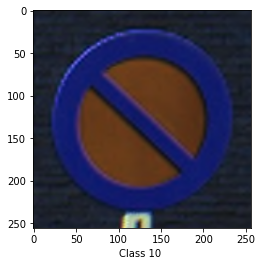

In [99]:
random_train_index = random.randint(0, len(X_train)) # Getting random index from X_train list to show images randomly everytime

plt.imshow(X_train[random_train_index])
# Labeling image with class name, here 1 is added because previously we subtracted 1 for converting class labels to (0-9) instead of (1-10)
plt.xlabel("Class {} ".format(y_train[random_train_index] + 1))
plt.show()

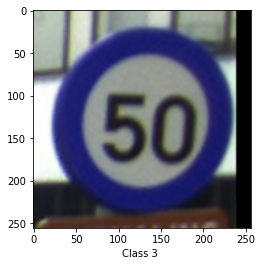

In [100]:
# Repeating same procedure for displaying random test image
random_test_index = random.randint(0, len(X_test))

plt.imshow(X_test[random_test_index])
plt.xlabel("Class {} ".format(y_test[random_test_index] + 1))
plt.show()

In [101]:
# Converting list to numpy arrays as we will need data in numpy form to feed it to the CNN model
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [102]:
# Shapes of X_train, y_train, X_test, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 256, 256, 3)
(799,)
(200, 256, 256, 3)
(200,)


In [103]:
# Normalizing train and test data
X_train = X_train / 255
X_test = X_test / 255

In [104]:
# Creating CNN model for fitting our dataset on it for classification
model = Sequential()

# Applyting 2D Convolution of size 32x32 and kernal size is 3x3 with activation RELU and 
# input shape is defined -> 256x256 (We have resized it previously) and 3 represents image has 3 channels as it is RGB
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(256,256,3)))

# Applying MaxPooling of size 2x2
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening and applying Fully Connected layer 128 with Activation relu
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Compiling model and Adam is used as an optimizer
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Applying Fully Connected layer of size 10 as we have 10 classes to be predicted and Softmax is used to compute probablities of image belonging to each class
model.add(Dense(10, activation='softmax'))

# Displaying summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 516128)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               66064512  
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 66,066,698
Trainable params: 66,066,698
Non-trainable params: 0
__________________________________________

In [105]:
# Fittign model and batch size and epoch size is 1 only
model.fit(X_train, y_train, batch_size=1, epochs=1, validation_data=(X_test, y_test))

799/799 [==============================] - 269s 333ms/step - loss: 1.9165 - accuracy: 0.7397 - val_loss: 0.7938 - val_accuracy: 0.7850


In [106]:
# Evaluating model by computing loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

7/7 - 3s - loss: 0.7938 - accuracy: 0.7850 - 3s/epoch - 415ms/step


In [107]:
# Predicting X_test data and getting probabilities from softmax
y_predicted_probabilities = model.predict(X_test)

In [108]:
y_predicted = []

for y_probability in y_predicted_probabilities:
  y_predicted.append(np.argmax(y_probability)) # Getting class whose probability is maximum for each prediction

In [109]:
y_predicted = np.array(y_predicted) # Converting to numpy array as y_test is also in same form

# Getting difference of y_test and y_predicted class to compute different things like (correctly classified, false positives etc)
difference = y_test - y_predicted

print('Correctly classified: ', np.where(difference == 0)[0].shape[0])
print('Incorrectly classified: ', np.where(difference != 0)[0].shape[0])
print('False positives: ', np.where(difference == -1)[0])
print('False negatives: ', np.where(difference == 1)[0])

print("\nLoss: {:.3f}".format(loss))
print("Accuracy: {:.3f}".format(accuracy))

Correctly classified:  157
Incorrectly classified:  43
False positives:  [23 26 27 28 36]
False negatives:  [46 47 48 56]

Loss: 0.794
Accuracy: 0.785


In [110]:
# Getting correctly and incorrectly classified images
correctly_classified = np.where(difference == 0)[0]
incorrectly_classified = np.where(difference != 0)[0]

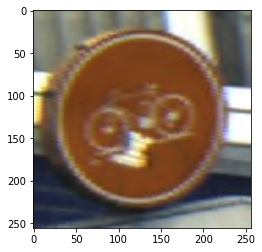

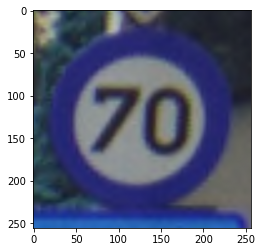

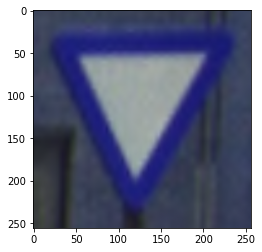

In [111]:
# Displaying 3 random images from correctly classified ones
for i in range(3):
  index = random.randint(0, len(correctly_classified))
  plt.imshow(X_test[correctly_classified[index]])
  plt.show()

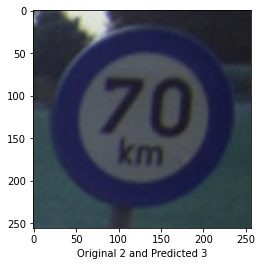

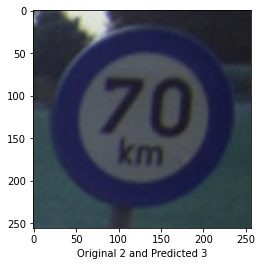

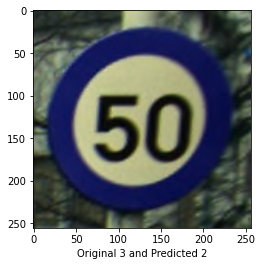

In [112]:
# Displaying 3 random images from incorrectly classified ones
for i in range(3):
  index = random.randint(0, len(incorrectly_classified))
  plt.imshow(X_test[incorrectly_classified[index]])

  # Showing the original class and predicted class as label
  plt.xlabel("Original {} and Predicted {}".format(y_test[incorrectly_classified[index]] + 1, y_predicted[incorrectly_classified[index]] + 1))
  plt.show()